## Handling Non Linear Datasets

In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500,noise=0.05)

In [3]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


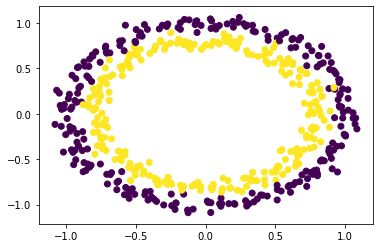

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],X.shape[1]+1))
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [6]:
X_ = phi(X)

In [23]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if show:
        plt.show()
    
    return ax

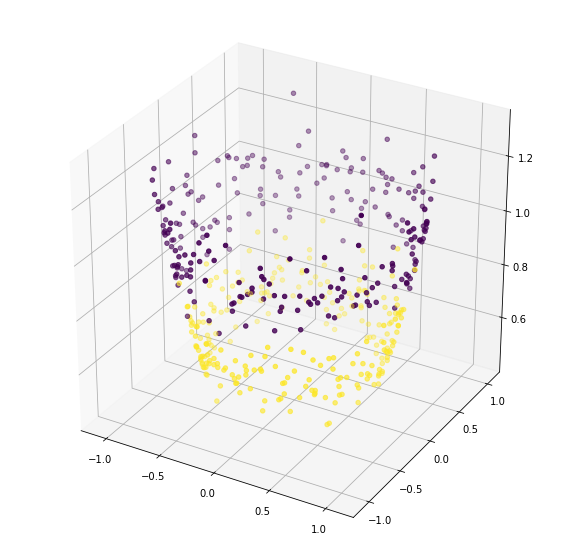

In [8]:
plot3d(X_)

## Logistic Classifier

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
lr = LogisticRegression()

In [12]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.4000


In [16]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 97.6000


## Visualise the Surface

In [17]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
wts = lr.coef_
print(wts)

[[ 1.49173858e-01 -3.34434930e-03 -1.01809033e+01]]


In [19]:
bias = lr.intercept_
print(bias)

[8.40360881]


In [20]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [21]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.79678095 0.81143327 0.82608559 0.84073791]
 [0.79645245 0.81110477 0.82575709 0.84040942]
 [0.79612396 0.81077628 0.8254286  0.84008092]
 [0.79579547 0.81044779 0.82510011 0.83975243]]


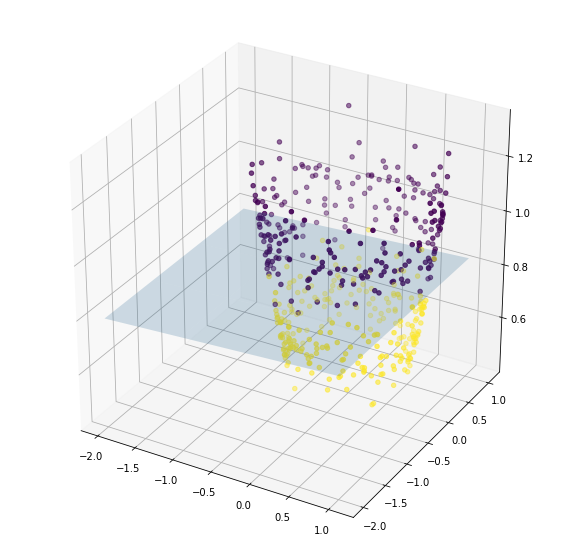

In [24]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()